In [1]:
! pip install seaborn
import pandas as pd
import numpy as np 
import sklearn as skl 
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [2]:
#Import Data 
URL= 'https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
df=pd.read_csv(URL,low_memory=False)

In [3]:
#delete colomns with 'not enough information' or not important information
df.drop(['SEVERITYCODE.1','REPORTNO','EXCEPTRSNCODE','EXCEPTRSNDESC','INATTENTIONIND','PEDROWNOTGRNT','SPEEDING','OBJECTID','INCKEY','COLDETKEY','STATUS','SDOTCOLNUM','SEGLANEKEY','CROSSWALKKEY'], inplace=True, axis=1, errors='ignore')


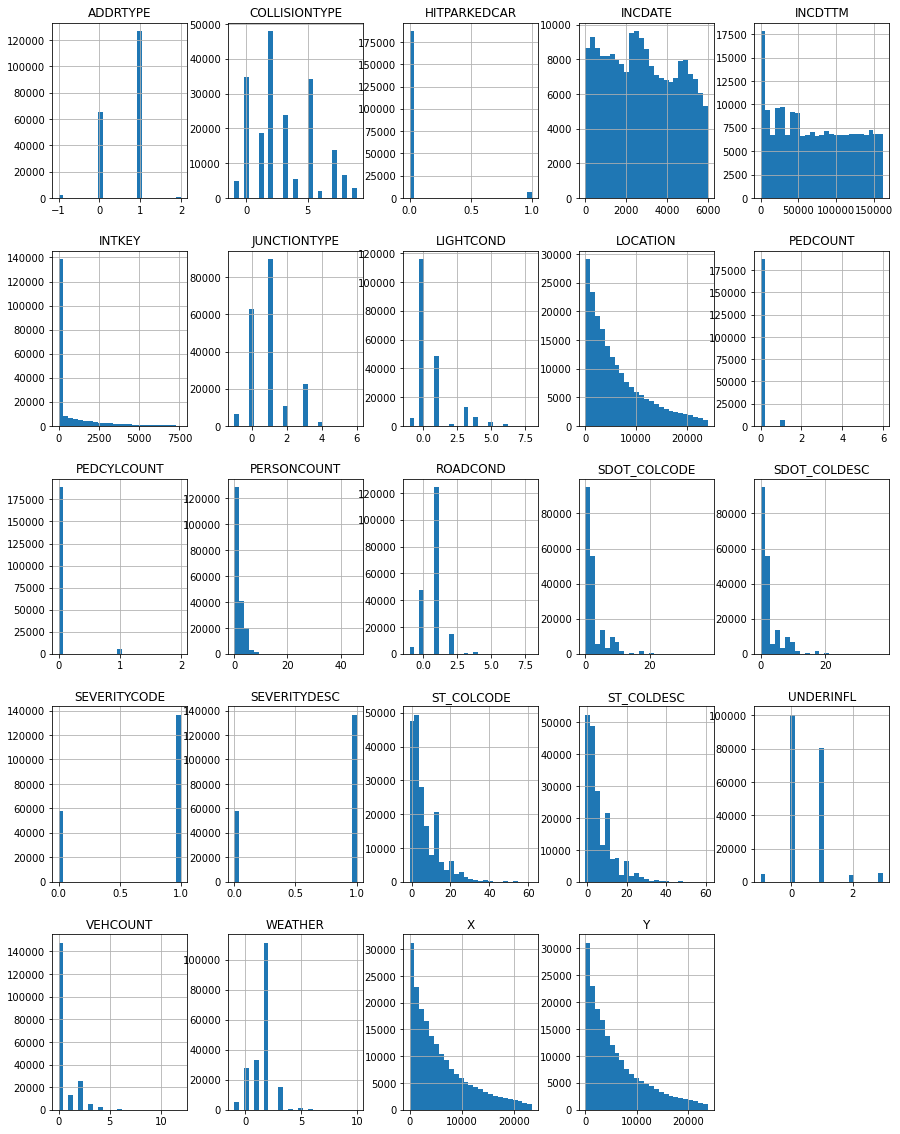

In [4]:
#to count a category histogramm of each column 
ax = df.apply(lambda x: pd.factorize(x)[0]).hist(bins=25,figsize = (15,20))

In [5]:
#to detect and count missing data
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())


SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64
X
False    189339
True       5334
Name: X, dtype: int64
Y
False    189339
True       5334
Name: Y, dtype: int64
ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64
INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64
LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64
SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64
COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64
PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64
PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64
PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64
VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64
INCDATE
False    194673
Name: INCDATE, dtype: int64
INCDTTM
False    194673
Name: INCDTTM, dtype: int64
JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64
SDOT_COLCODE
False    194673
Name: SDOT_COLCODE, dtype: int64
SDOT_C

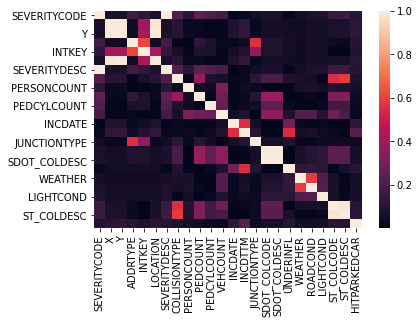

In [6]:
#calculate a corroletion coefficient of original dataframe (before cleaning)
df_original_facto = df.apply(lambda x: pd.factorize(x)[0])

sns.heatmap(abs(df_original_facto.corr()))

In [7]:
#Let's deal with missing values and cleaning data !

In [8]:
#to remove duplicated rows
df.drop_duplicates( keep='first', inplace=True)

In [9]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)

In [10]:
#Select columns with type "int" or "float"
num= df.select_dtypes(include=['float','int']).copy()


In [11]:
missing_data = num.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())

SEVERITYCODE
False    194617
Name: SEVERITYCODE, dtype: int64
X
False    189301
True       5316
Name: X, dtype: int64
Y
False    189301
True       5316
Name: Y, dtype: int64
INTKEY
True     129560
False     65057
Name: INTKEY, dtype: int64
PERSONCOUNT
False    194617
Name: PERSONCOUNT, dtype: int64
PEDCOUNT
False    194617
Name: PEDCOUNT, dtype: int64
PEDCYLCOUNT
False    194617
Name: PEDCYLCOUNT, dtype: int64
VEHCOUNT
False    194617
Name: VEHCOUNT, dtype: int64
SDOT_COLCODE
False    194617
Name: SDOT_COLCODE, dtype: int64


In [12]:
##Replace missing data by mean
L = ["Y","X","INTKEY"]
for i in L:
    avg_i = num[i].astype("float").mean(axis=0)
    print("Average of " + i + ":", avg_i)
    num[i].replace(np.nan, avg_i, inplace=True)

Average of Y: 47.61954034788702
Average of X: -122.33051877393729
Average of INTKEY: 37552.707302826755


In [13]:
#Select columns with type 'object'
obj= df.select_dtypes(include=['object']).copy()


In [14]:
#We can also use the “.idxmax()” method to calculate for us the most common type automatically
#lambda : apply to both rows and columns of a dataframe. 
obj.apply(lambda x: pd.value_counts(x).idxmax(x)[0])

ADDRTYPE         B
LOCATION         B
SEVERITYDESC     P
COLLISIONTYPE    P
INCDATE          2
INCDTTM          1
JUNCTIONTYPE     M
SDOT_COLDESC     M
UNDERINFL        N
WEATHER          C
ROADCOND         D
LIGHTCOND        D
ST_COLCODE       3
ST_COLDESC       O
HITPARKEDCAR     N
dtype: object

In [15]:
for column in obj.columns:
     print("\n" + column)
     print(obj[column].value_counts())


ADDRTYPE
Block           126897
Intersection     65057
Alley              751
Name: ADDRTYPE, dtype: int64

LOCATION
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N    275
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB    269
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N          265
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                    254
6TH AVE AND JAMES ST                                              252
                                                                 ... 
NW 45TH ST BETWEEN 1ST AVE NW AND 2ND E AVE NW                      1
N 37TH ST BETWEEN CORLISS AVE N AND SUNNYSIDE AVE N                 1
THORNDYKE AVE W AND W LYNN ST                                       1
CHELAN AVE SW AND WEST MARGINAL WAY SW                              1
24TH AVE E AND E THOMAS ST                                          1
Name: LOCATION, Length: 24102, dtype: int64

SEVERITYDESC
Property Damage Only Collision    136440
Injury Collis

In [16]:
##Replace missing data by frequency
dictionnaire = {'ADDRTYPE': 'Block', "LOCATION": 'BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N', "SEVERITYDESC": 'Property Damage Only Collision', 'COLLISIONTYPE': 'Parked Car', "INCDATE": '2006/11/02 00:00:00+00', 'INCDTTM': '11/2/2006',  'JUNCTIONTYPE': "Mid-Block (not related to intersection)","SDOT_COLDESC": 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE', 'UNDERINFL': 'N', "WEATHER": "Clear", "ROADCOND" : "Dry", 'ST_COLCODE': '32', "ST_COLDESC": 'One parked--one moving', 'HITPARKEDCAR':'N',"LIGHTCOND" :"Daylight"}

for k, v in dictionnaire.items():
  
    obj[k].replace(np.nan, v, inplace=True)

In [17]:
#to convert object columns to numérical 
df_obj_facto = obj.apply(lambda x: pd.factorize(x)[0])


In [18]:
#use concat function to combine two dataframe
df_cleaned= pd.concat([num, df_obj_facto],axis=1)


In [19]:
#to save dataframe to CSV
file_name='clean_df.csv'
df_cleaned.to_csv(file_name)

In [20]:
#to check if there are missing values
df_cleaned.isna().sum()

SEVERITYCODE     0
X                0
Y                0
INTKEY           0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
SDOT_COLCODE     0
ADDRTYPE         0
LOCATION         0
SEVERITYDESC     0
COLLISIONTYPE    0
INCDATE          0
INCDTTM          0
JUNCTIONTYPE     0
SDOT_COLDESC     0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
ST_COLCODE       0
ST_COLDESC       0
HITPARKEDCAR     0
dtype: int64

In [21]:
#In explanatory data analysing step, we analyzed how different features related to the severity of an accident
#by calculating the correlation coefficient.

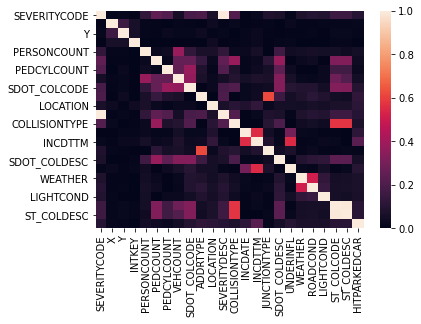

In [22]:
sns.heatmap(abs(df_cleaned.corr()))


In [23]:
#Train/Test Split
#We will use 30% of our data for testing and 70% for training.
x = df_cleaned
y = df_cleaned['SEVERITYCODE']

In [24]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3,random_state=1100)
print ('Train set:', x_train.shape, y_train.shape)
print ('Test set:', x_test.shape, y_test.shape)

Train set: (136231, 24) (136231,)
Test set: (58386, 24) (58386,)


In [25]:
#Building the decision tree model 
tree= DTC(criterion='entropy',max_depth=1).fit(x_train,y_train)
yhatdtc=tree.predict(x_test)
print( 'The predicted result is : ' , yhatdtc)

The predicted result is :  [2 2 2 ... 1 2 1]


In [26]:
#Building the KNN model
score={}
for k in range(1,50):
    neigh = KNN(n_neighbors = k).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    train_score= skl.metrics.accuracy_score(y_train,neigh.predict(x_train))
    test_score= skl.metrics.accuracy_score(y_test,yhat)
    score[k]= test_score
    print(k, 'train : ', train_score , ' test : ', test_score)
best_score=max(score.values())
#finding the k : 
for i,j in score.items():
    if j == best_score: 
        best_k=i
        break
print('the best k is', best_k)

1 train :  1.0  test :  0.601154386325489
2 train :  0.799663806328956  test :  0.6735518788750728
3 train :  0.8014989246206811  test :  0.6371047853937588
4 train :  0.7577790664386226  test :  0.6773370328503409
5 train :  0.758931520725826  test :  0.6545062172438598
6 train :  0.7399930999552231  test :  0.6816702634193128
7 train :  0.7405436354427406  test :  0.6651423286404275
8 train :  0.7303110158480816  test :  0.6818586647483986
9 train :  0.730714741872261  test :  0.6715993560100024
10 train :  0.724827682392407  test :  0.6857808378720927
11 train :  0.7246882134022359  test :  0.6759154591854212
12 train :  0.7194397750879021  test :  0.687870379885589
13 train :  0.7205775484287718  test :  0.6807453841674374
14 train :  0.7171495474598293  test :  0.6888808961052307
15 train :  0.7178175305180172  test :  0.6839310793683417
16 train :  0.7150575126072627  test :  0.6892576987634021
17 train :  0.7153364505876049  test :  0.6849587229815367
18 train :  0.7137215464908

In [27]:
#Building the LR model 
LR1 = LR(C=0.01, solver='liblinear').fit(x_train,y_train)
LR1

LogisticRegression(C=0.01, solver='liblinear')

In [28]:
yhat1 = LR1.predict(x_test)
yhat1

array([2, 2, 2, ..., 1, 2, 1])

In [29]:
#Building SVM 
##Let’s just use the default, RBF (Radial Basis
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)

SVC()

In [30]:
yhat2 = clf.predict(x_test)
yhat2


array([1, 1, 1, ..., 1, 1, 1])

In [31]:
#Evaluation 
#Now we will check the accuracy of our models
#Let's start with Decision tree
#jaccard_similarity_score and F1-score


In [32]:
Jaccard_tree=jaccard_score(y_test, yhatdtc)
f1=f1_score(y_test, yhatdtc, average='binary')
print('Jaccard:',Jaccard_tree)
print('F1-Score: ' ,f1)

Jaccard: 1.0
F1-Score:  1.0


In [33]:
#Model is most accurate with a max depth of 1

In [34]:
#we will evaluate KNN model 
#Jaccard_index and F1-score
Jaccard_KNN=jaccard_score(y_test, yhat)
f1=f1_score(y_test, yhat, average='binary')
print('Jaccard:',Jaccard_KNN)
print('F1-Score: ' ,f1)

Jaccard: 0.6884667760745836
F1-Score:  0.8154934237736785


In [35]:
#Model is most accurate when k is 1

In [36]:
#we will evaluate Logistic Regression model
#Jaccard_index, F1-score and logloss
Jaccard_Regression=jaccard_score(y_test, yhat1)
f1=f1_score(y_test, yhat1, average='binary')
print('Jaccard:',Jaccard_Regression)
print('F1-Score: ' ,f1)


Jaccard: 0.95413080693197
F1-Score:  0.9765270610824434


In [37]:
yhat_prob = LR1.predict_proba(x_test)
yhat_prob
logloss_Regeression=log_loss(y_test, yhat_prob)
print('log_loss: ' ,logloss_Regeression)

log_loss:  0.24345084934687208


In [38]:
#Model is most accurate when the inverse of regularization strength parameter C=0.01

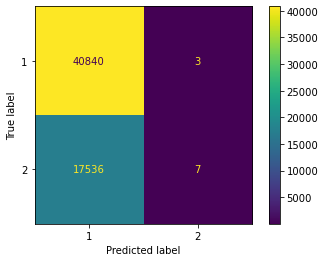

In [39]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test)  
plt.show() 

In [48]:
#Lets try jaccard index for accuracy:
j2=jaccard_score(y_test, yhat2)
f2=f1_score(y_test, yhat2, average='weighted')
print('Jaccard:', f2)
print('F1-Score: ' ,j2)


Jaccard: 0.5761167282924811
F1-Score:  0.6995666249850118
